In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mohinh/dulieu


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
data=pd.read_csv('/kaggle/input/mohinh/dulieu')

In [4]:
data

,year,category,topic,indicator,data_value,confidence_limit_low,confidence_limit_high
0,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
1,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
2,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
3,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
4,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
...,...,...,...,...,...,...,...
34999,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35000,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35001,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076
35002,2011,0.0,2.0,10.0,36.370628,32.607573,40.178076


In [5]:
X= data.drop('topic', axis=1)

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X

,year,category,indicator,data_value,confidence_limit_low,confidence_limit_high
0,2011,0.0,10.0,36.370628,32.607573,40.178076
1,2011,0.0,10.0,36.370628,32.607573,40.178076
2,2011,0.0,10.0,36.370628,32.607573,40.178076
3,2011,0.0,10.0,36.370628,32.607573,40.178076
4,2011,0.0,10.0,36.370628,32.607573,40.178076
...,...,...,...,...,...,...
34999,2011,0.0,10.0,36.370628,32.607573,40.178076
35000,2011,0.0,10.0,36.370628,32.607573,40.178076
35001,2011,0.0,10.0,36.370628,32.607573,40.178076
35002,2011,0.0,10.0,36.370628,32.607573,40.178076


In [7]:
y = np.array(data['topic'])
y

array([2., 2., 2., ..., 2., 2., 2.])

In [8]:
ratio = 0.2 #
X_train,X_test,y_train,y_test = train_test_split(X_std, y, test_size= ratio, shuffle= True, stratify=y)

In [9]:
X_train.shape

(28003, 6)

In [10]:
X_test.shape

(7001, 6)

# 1. NaiveBayes

In [23]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB, CategoricalNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [24]:
model.score(X_test, y_test)

0.801314097986002

# 1.2 Tối ưu kết quả NaiveBayes

## Kiểm tra xác thực chéo

In [37]:
kf= KFold(n_splits=10)
train = kf.split(X_std,y)
fold_indices = []
for i, (train_index, test_index) in enumerate(train):
    fold_indices. append((train_index, test_index))

In [38]:
cross_val_scores_gau_nb = cross_val_score(model, X_std, y, cv=fold_indices, scoring='accuracy')
mean_accuracy_gau_nb = np.mean(cross_val_scores_gau_nb)

In [39]:
print('cross_val_scores_gau_nb', cross_val_scores_gau_nb)
print('mean_accuracy_gau_nb',mean_accuracy_gau_nb)

cross_val_scores_gau_nb [0.67580691 0.98257641 0.9125964  0.92430734 0.86885714 0.762
 0.60285714 0.52828571 0.55714286 0.76657143]
mean_accuracy_gau_nb 0.7581001346554046


## GridSearchCV

In [53]:
parameters = {'var_smoothing': np.logspace(0, -9, num=100)}
grid_search_gau_nb = GridSearchCV(model,
                  param_grid=parameters,
                  scoring='accuracy',
                                 cv=10)
grid_search_gau_nb.fit(X_train, y_train)
best_gau_nb = grid_search_gau_nb.best_estimator_

y_pred_best_gau_nb = best_gau_nb.predict(X_test)

accuracy_best_gau_nb = metrics.accuracy_score(y_test, y_pred_best_gau_nb)
precision_best_gau_nb = metrics.precision_score(y_test, y_pred_best_gau_nb, average='macro')
recall_best_gau_nb = metrics.recall_score(y_test, y_pred_best_gau_nb, average='macro')

In [54]:
accuracy_best_gau_nb, precision_best_gau_nb, recall_best_gau_nb

(0.801314097986002, 0.9070419375579609, 0.8773651667676642)

# 2.Cây quyết định

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

[Text(0.4, 0.9166666666666666, 'x[1] <= -1.012\nentropy = 3.043\nsamples = 28003\nvalue = [1878, 4659, 1082, 2163, 4326, 1165, 6989, 2163, 2496\n1082]'),
 Text(0.15, 0.75, 'x[2] <= 1.628\nentropy = 1.532\nsamples = 4042\nvalue = [1878, 0, 1082, 0, 0, 0, 0, 0, 0, 1082]'),
 Text(0.1, 0.5833333333333334, 'x[2] <= -0.257\nentropy = 0.947\nsamples = 2960\nvalue = [1878, 0, 1082, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.05, 0.4166666666666667, 'entropy = 0.0\nsamples = 1470\nvalue = [1470, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.15, 0.4166666666666667, 'x[2] <= 0.78\nentropy = 0.847\nsamples = 1490\nvalue = [408, 0, 1082, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 1082\nvalue = [0, 0, 1082, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 408\nvalue = [408, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.2, 0.5833333333333334, 'entropy = 0.0\nsamples = 1082\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1082]'),
 Text(0.65, 0.75, 'x[2] <= 1.251\nentropy = 2.602\nsamples = 23961\nv

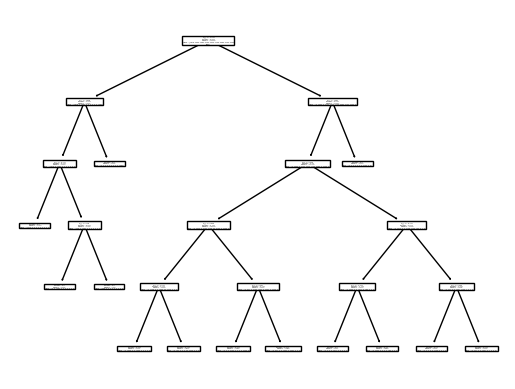

In [56]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
clf = clf.fit(X_train, y_train)
plot_tree(clf)

In [57]:
clf.score(X_train, y_train)

0.7951290933114309

In [58]:
y_pred = clf.predict(X_test)

In [59]:
clf.score(X_test, y_test)

0.7874589344379375

# Tối ưu hóa

In [62]:
score_max = [0,0]
for k in range(3, 1000):
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=k)
    score_k = cross_val_score(clf,
                X_std,
                y,
                scoring ='accuracy',
                cv=fold_indices).mean()
    if score_k>score_max[0]:
        score_max[0]= score_k
        score_max[1]= k

In [64]:
score_max # 

[0.9905455584118823, 13]

In [83]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=score_max[1])

In [84]:
lf=clf.fit(X_train, y_train)

In [85]:
lf.score(X_test, y_test) # xảy ra hiện tượng overfitting

1.0